In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq
import random

def generate_graph(num_nodes, density):
    """Generates a connected graph based on the number of nodes and density."""
    graph = nx.Graph()
    graph.add_nodes_from(range(num_nodes))

    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < density:
                weight = random.randint(1, 10)
                graph.add_edge(i, j, weight=weight)

    # Ensure the graph is connected
    if not nx.is_connected(graph):
        return generate_graph(num_nodes, density)

    return graph

def generate_negative_weight_graph(num_nodes, density):
    """Generates a connected graph based on the number of nodes and density."""
    graph = nx.Graph()
    graph.add_nodes_from(range(num_nodes))

    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < density:
                weight = random.randint(-10, 10)
                graph.add_edge(i, j, weight=weight)

    # Ensure the graph is connected
    if not nx.is_connected(graph):
        return generate_graph(num_nodes, density)

    return graph

def prim_mst(graph):
    """Finds the MST of a graph using Prim's algorithm and returns the MST with its total weight."""
    # Priority queue to keep track of edges with the lowest weight
    edge_pq = []
    # Start with an arbitrary node, here node 0
    start_node = list(graph.nodes())[0]
    # Set to keep track of visited nodes
    visited = set([start_node])
    # Add all adjacent edges to the priority queue
    for u, v, weight in graph.edges(start_node, data='weight'):
        heapq.heappush(edge_pq, (weight, start_node, v))

    mst = nx.Graph()
    mst.add_node(start_node)
    total_weight = 0

    # Process edges with the lowest weight first
    while edge_pq and len(mst.nodes) < len(graph.nodes):
        weight, u, v = heapq.heappop(edge_pq)
        if v not in visited:
            visited.add(v)
            mst.add_edge(u, v, weight=weight)
            total_weight += weight
            # Add all new edges from the newly added node
            for next_node, data in graph[v].items():
                if next_node not in visited:
                    heapq.heappush(edge_pq, (data['weight'], v, next_node))

    return mst, total_weight


Test the Prims algorithm with sparse graphs

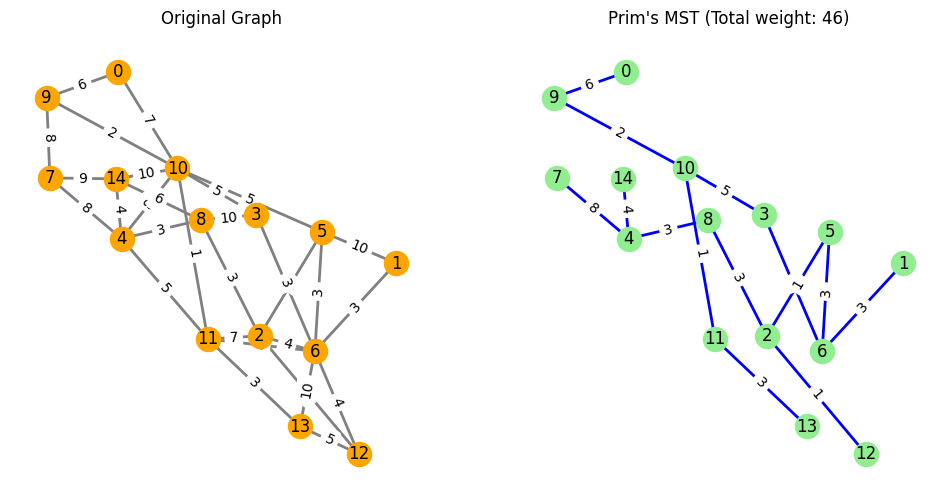

In [ ]:
# Generate graph and find MST using Prim's algorithm
num_nodes = 15
density = 0.3
graph = generate_graph(num_nodes, density)
mst, total_weight = prim_mst(graph)

# Plotting the results
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 6))

# Plotting the original graph
plt.subplot(121)
nx.draw(graph, pos, with_labels=True, node_color='orange', edge_color='gray', width=2)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.title("Original Graph")

# Plotting the MST produced by Prim's algorithm
plt.subplot(122)
nx.draw(mst, pos, with_labels=True, node_color='lightgreen', edge_color='blue', width=2)
edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels)
plt.title(f"Prim's MST (Total weight: {total_weight})")
plt.show()

Test the Prims algorithm with dense graphs

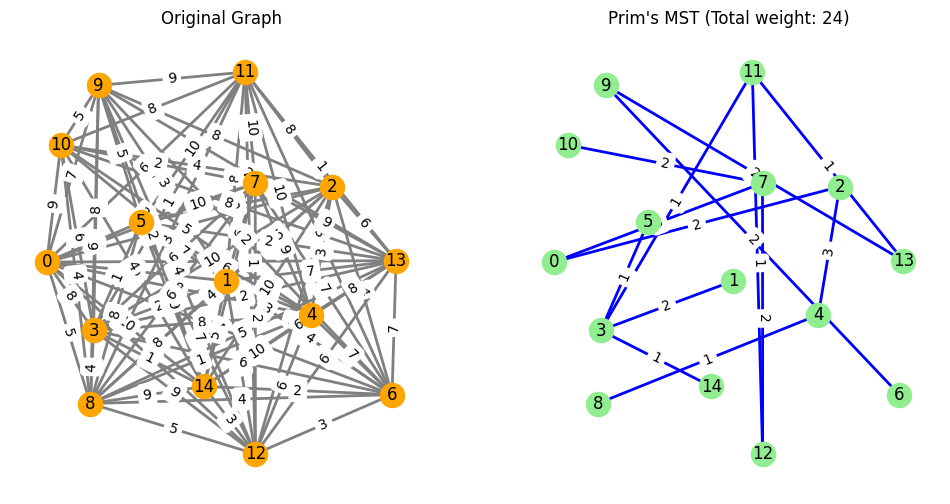

In [ ]:
# Generate graph and find MST using Prim's algorithm
num_nodes = 15
density = 0.9
graph = generate_graph(num_nodes, density)
mst, total_weight = prim_mst(graph)

# Plotting the results
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 6))

# Plotting the original graph
plt.subplot(121)
nx.draw(graph, pos, with_labels=True, node_color='orange', edge_color='gray', width=2)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.title("Original Graph")

# Plotting the MST produced by Prim's algorithm
plt.subplot(122)
nx.draw(mst, pos, with_labels=True, node_color='lightgreen', edge_color='blue', width=2)
edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels)
plt.title(f"Prim's MST (Total weight: {total_weight})")
plt.show()

Test the Prims algorithm with negative weight graphs

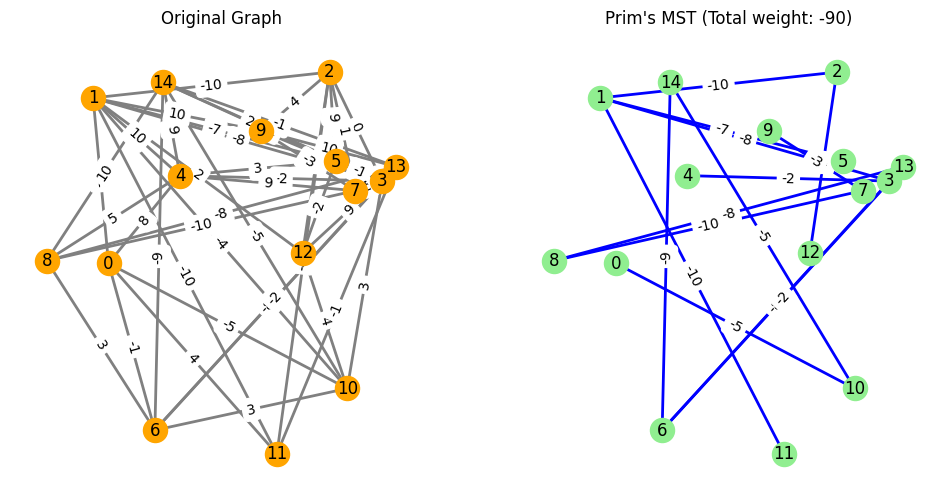

In [ ]:
# Generate graph and find MST using Prim's algorithm
num_nodes = 15
density = 0.5
graph = generate_negative_weight_graph(num_nodes, density)
mst, total_weight = prim_mst(graph)

# Plotting the results
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 6))

# Plotting the original graph
plt.subplot(121)
nx.draw(graph, pos, with_labels=True, node_color='orange', edge_color='gray', width=2)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.title("Original Graph")

# Plotting the MST produced by Prim's algorithm
plt.subplot(122)
nx.draw(mst, pos, with_labels=True, node_color='lightgreen', edge_color='blue', width=2)
edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels)
plt.title(f"Prim's MST (Total weight: {total_weight})")
plt.show()